<a href="https://colab.research.google.com/github/dj-1087/Algorithm-TIL-/blob/master/Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **DP**

## Fibonacci

### recursive call

In [ ]:
def fibo(n):
    if n<=1:
        return n
    return fibo(n-1)+fibo(n-2)

In [ ]:
for i in range(10):
    print(f"fibo({i}): {fibo(i)}")

fibo(0): 0
fibo(1): 1
fibo(2): 1
fibo(3): 2
fibo(4): 3
fibo(5): 5
fibo(6): 8
fibo(7): 13
fibo(8): 21
fibo(9): 34


### Dynamic Programming

In [ ]:
def fibo_dp(n):
    cache = [0 for i in range(n+1)]
    cache[0] = 0
    cache[1] = 1

    for i in range(2,n+1):
        cache[i] = cache[i-1]+cache[i-2]
    return cache[n]

In [ ]:
for i in range(10):
    print(f"fibo({i}): {fibo(i)}")

fibo(0): 0
fibo(1): 1
fibo(2): 1
fibo(3): 2
fibo(4): 3
fibo(5): 5
fibo(6): 8
fibo(7): 13
fibo(8): 21
fibo(9): 34


## 01타일

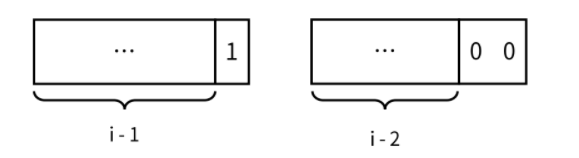

In [ ]:
N = int(input())
cache = [0]*100000
cache[0] = 1
cache[1] = 2
for i in range(2,N):
    cache[i] = cache[i-1]+cache[i-2]%15746
print(cache[N-1])

4
5


## 평범한 배낭

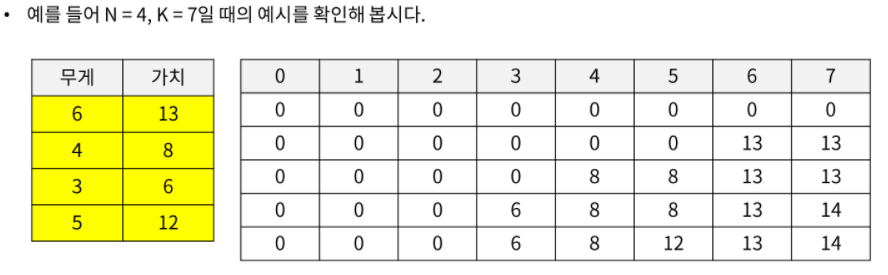

In [ ]:
n, W = map(int, input().split())
cache = [[0]*(W+1) for _ in range(n+1)]
for i in range(1,n+1):
    w, v = map(int, input().split())
    for j in range(1, W+1):
        if j < w:
            cache[i][j] = cache[i-1][j]
        else:
            cache[i][j] = max(cache[i-1][j], cache[i-1][j-w]+v)

print(cache[n][W])

4 7
6 13
4 8
3 6
5 12
14


## 가장 긴 증가하는 부분 수열

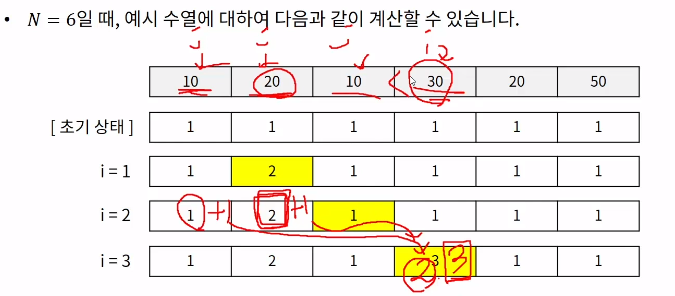

In [ ]:
n = int(input())
A = list(map(int,input().split()))
cache = [1]*n
for i in range(n):
    for j in range(i):
        if A[i] > A[j]:
            cache[i] = max(cache[i], cache[j]+1)
print(max(cache))

6
10 20 10 30 20 50
4


## LCS

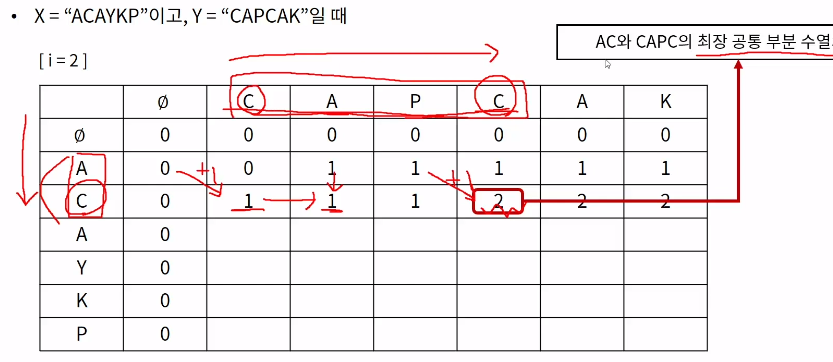

In [ ]:
x = input()
y = input()
cache = [[0]*(len(y)+1) for _ in range(len(x)+1)]
for i in range(1,len(x)+1):
  for j in range(1,len(y)+1):
    if x[i-1] == y[j-1]:
      cache[i][j] = cache[i-1][j-1]+1
    else:
      cache[i][j] = max(cache[i][j-1],cache[i-1][j])
print(cache[len(x)][len(y)])

ACAYKP
CAPCAK
4


## 기타리스트

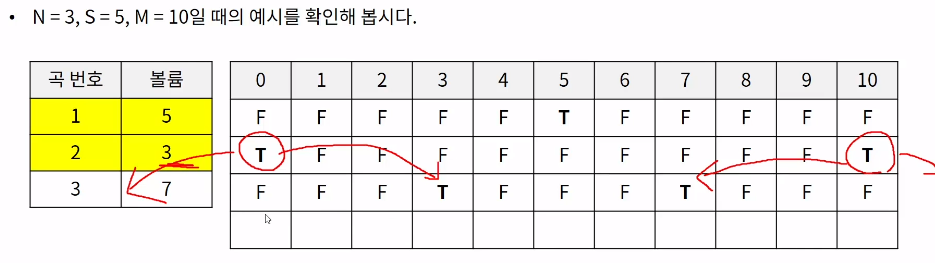

In [ ]:
# 메모리 초과
N, S, M = map(int, input().split())
li = list(map(int, input().split()))
cache = [[] for i in range(N+1)]
cache[0].append(S)
for i in range(1,N+1):
  for j in range(len(cache[i-1])):
    up = cache[i-1][j] + li[i-1]
    if up <= M:
      cache[i].append(up)
    down = cache[i-1][j] - li[i-1]
    if down >= 0:
      cache[i].append(down)
if cache[N]==[]:
  print(-1)
else:
  print(max(cache[N]))

3 5 10
5 3 7
10


In [ ]:
n, s, m = map(int, input().split())
array = list(map(int, input().split()))

dp = [[0]*(m+1) for _ in range(n+1)]
dp[0][s] = 1
for i in range(n+1):
  for j in range(m+1):
    if dp[i-1][j] == 0:
      continue
    if j - array[i-1] >= 0:
      dp[i][j - array[i-1]] = 1
    if j + array[i-1] <= m:
      dp[i][j + array[i-1]] = 1

result = -1
for i in range(m,-1,-1):
  if dp[n][i] == 1:
    result = i
    break

print(result)

3 5 10
5 3 7
10


## 가장높은탑쌓기

In [ ]:
n = int(input())
blocks = []
cache = [1]*n

for i in range(n):
  blocks.append(list(map(int, input().split())))
for i in range(n):
  for j in range(i):
    if blocks[i][0]<blocks[j][0] and blocks[i][2]<blocks[j][2]:
      cache[i] = max(cache[i], cache[j]+1)

cnt = max(cache)
print(cnt)
for i in range(cnt,-1,-1):
  for j in range(n):
    if cache[j] == i:
      print(j+1)
      break

5
25 3 4
4 4 6
9 2 3
16 2 5
1 5 2
3
5
3
1


In [ ]:
5
25 3 4
4 4 6
9 2 3
16 2 5
1 5 2
